In [58]:
import sympy as sp

x, y = sp.symbols("x y")
a, b = sp.symbols("a b")

# define the slope of the line
m = (b - a)*sp.Rational(1, 3)

# define the inverse function when looking from y direction
inverse = -1 / m * (y - a) + 3

# calculate Gx and Gy
Gx = sp.integrate(a + m * x, (x, 2, 3)) - sp.integrate(a + m * x, (x, 0, 1))
Gy = a * 3 + sp.integrate(inverse, (y, a, 1)) - sp.integrate(inverse, (y, 2, b))
# general form that has limitations in the symbolic calculations
# a_limits = sp.Piecewise((0, a < 0), (a, a <= 1), (1, a > 1))
# b_limits = sp.Piecewise((2, b < 2), (b, b <= 3), (3, b > 3))
# Gy = a_limits * 3 + sp.integrate(inverse, (y, a_limits, 1)) - sp.integrate(inverse, (y, 2, b_limits))

# Calculate orientation index
I = sp.simplify(Gy/Gx)

# verify that in the extreme case of 45 degrees gives 1.
print(f"Verification: {I.subs([(b, 3), (a, 0)]) == 1}")
assert I.subs([(b, 3), (a, 0)]) == 1
I.subs([(a, 0), (b, 3)]), I.subs([(a, 1), (b, 2)])


Verification: True


(1, 9/2)

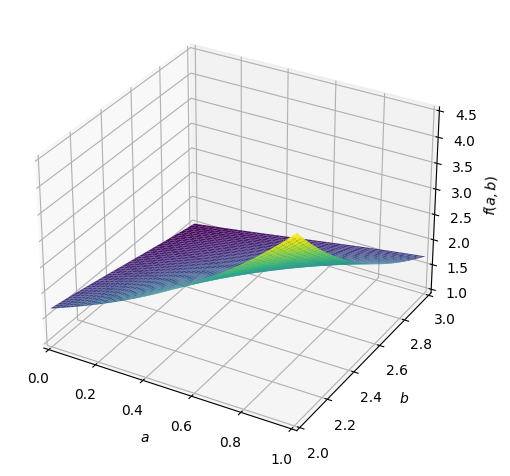

In [54]:
sp.plotting.plot3d(I, (a, 0, 1), (b, 2, 3))

### Analysis on the derivatives

If $\frac{\partial I}{\partial a}>0$ and $\frac{\partial I}{\partial b}<0$ over all the interval $a\in[0, 1]$ and $b\in[2, 3]$ it means that starting from the extreme value of $I(a=0, b=3)$ and making $a$ increase and $b$ decrease we will find always and ever increasing value of $I$ which implies that $I>1$ always.

##### Analysis of: $\frac{\partial I}{\partial a}>0$

In [21]:
E = sp.simplify(sp.diff(I, a))
Ia = E.func(*(sp.factor(term) for term in E.args))
Ia

9*(a*b + b**2 - 6*b + 5)/(2*(a - b)**3)

In [44]:
Ia.subs([(a, 0), (b, 3)]), Ia.subs([(a, 1), (b, 2)])

(2/3, 9/2)

In [52]:
Ia_change_sign = sp.solve(sp.numer(Ia), a)[0]
Ia_change_sign

-b + 6 - 5/b

In [76]:
# Ia does not change sign in the interval of b = [2, 3] \subset [1, 5]
sp.solve(Ia_change_sign)

[1, 5]

##### Analysis of: $\frac{\partial I}{\partial b}>0$

In [60]:
E = sp.simplify(sp.diff(I, b))
Ib = E.func(*(sp.factor(term) for term in E.args))
Ib

9*(-a**2 - a*b + 3*a + 3*b - 5)/(2*(a - b)**3)

In [61]:
Ib.subs([(a, 0), (b, 3)]), Ib.subs([(a, 1), (b, 2)])

(-2/3, -9/2)

In [63]:
Ib_change_sign = sp.solve(sp.numer(Ib), b)[0]
Ib_change_sign

(-a**2 + 3*a - 5)/(a - 3)

In [78]:
print("As all the roots are only complex numbers,",
      "the original function never vanishes when working on real numbers therefore" 
      "from (-2/3, -9/2) ")
sp.solve(sp.numer(Ib_change_sign), a)[0]

As all the roots are only complex numbers, the original function never vanishes when working on real numbers thereforefrom (-2/3, -9/2) 


3/2 - sqrt(11)*I/2